# Prediction Model



In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

# %matplotlib notebook

In [2]:
# The first step is to retrieve cleaned data 
df = pd.read_csv('./dataset/immoCollect52-clean.csv', index_col = 0)

## Cleaning / manipulation 

First, I'm going to do a little data cleansing to make sure that it corresponds precisely to my expectations for this project.

In [3]:
print(df.shape)
df.head()

(40791, 17)


,postal_code,type_of_property,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
6,1650,0,525000,4,220,1,1,1,0,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,0,549000,4,210,1,1,1,1,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,0,519000,3,273,1,0,1,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,0,535000,4,200,1,1,1,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
13,1421,0,105000,1,82,0,0,1,0,Braine-l'Alleud,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-2.645463


In [4]:
# I retrieve only utils columns for my model
df = df.iloc[:,0:9]

In [6]:
df_house = df[df['type_of_property'] == 0]
df_apartment = df[df['type_of_property'] == 1]

,postal_code,type_of_property,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,is_new
6,1650,0,525000,4,220,1,1,1,0
9,1332,0,549000,4,210,1,1,1,1
10,8310,0,519000,3,273,1,0,1,1
12,8200,0,535000,4,200,1,1,1,1
13,1421,0,105000,1,82,0,0,1,0


In [7]:
df_apartment.head()

,postal_code,type_of_property,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,is_new
5519,4000,1,45000,1,47,0,1,0,0
5520,4020,1,25000,1,125,1,1,0,1
5521,4020,1,25000,3,142,1,1,0,1
5523,6180,1,20000,1,115,1,0,1,0
5524,1030,1,50000,2,96,1,0,0,0


## Let's train and predict for HOUSE !

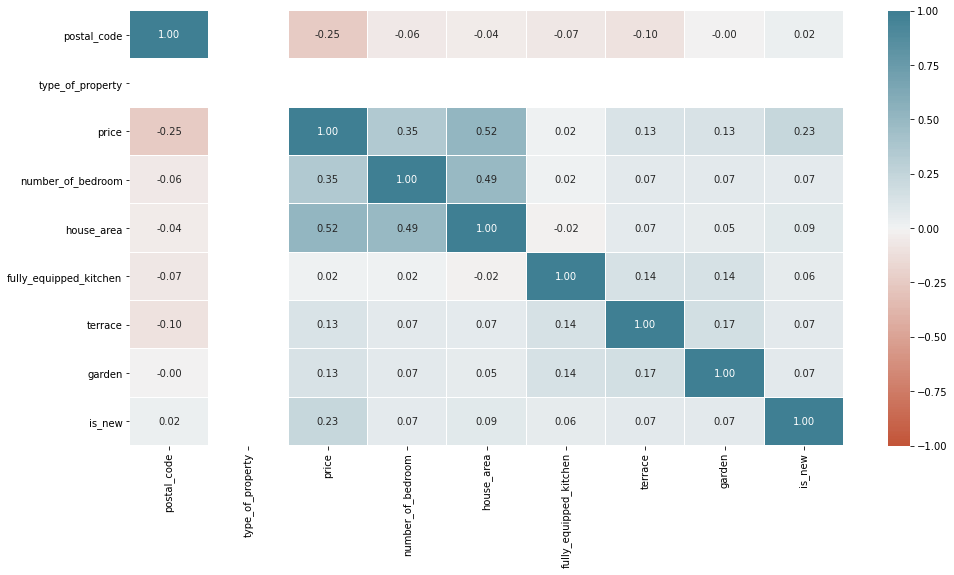

In [8]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df_house.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [9]:
X = df_house.drop(columns='price')
X.head()

,postal_code,type_of_property,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,is_new
6,1650,0,4,220,1,1,1,0
9,1332,0,4,210,1,1,1,1
10,8310,0,3,273,1,0,1,1
12,8200,0,4,200,1,1,1,1
13,1421,0,1,82,0,0,1,0


In [10]:
y = df_house[['price']]
y.head()

,price
6,525000
9,549000
10,519000
12,535000
13,105000


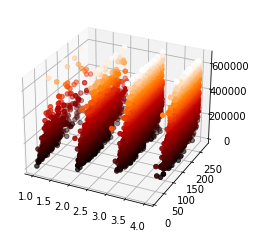

In [11]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( X['number_of_bedroom'],X['house_area'], y, c=y, cmap='gist_heat')
ax.view_init(27, -64)

### Split the dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [13]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train) # Entrainement du model

LinearRegression()

In [14]:
score = regressor.score(x_train,y_train)
score

0.37939920603870325